# Analysis of research gaps: evolution on time of RCTs, etc

In [1]:
setwd('/media/igna/Elements/HotelDieu/Cochrane')

G <- read.table("Mapping_Cancer/Tables/Local_research_gaps.txt")
data <- read.table("Mapping_Cancer/Flowchart/database_all_diseases_final_ok.txt")


In [2]:
#List of diseases per trial
#We supress injuries
L <- strsplit(as.character(data$GBD28),"&")
L <- lapply(L,function(x){x[x!="28"]})
#And for counting: trials with more than 4 diseases
Lct <- lapply(L,function(x){ifelse(length(x)>4,"",x)})
Lct <- lapply(Lct,as.numeric)

In [3]:
#Disease labels in data
Mgbd <- read.table("/home/igna/Desktop/Programs GBD/Classifier_Trial_GBD/Databases/Taxonomy_DL/GBD_data/GBD_ICD.txt")


In [4]:
#Function: for a given disease and region, list of RCTs concerning burden 
#of the region and labelled those concerning the dis
list_rcts <- function(dis,reg){    
    ddreg <- data[(1:nrow(data)%in%grep(reg,data$Regions)) & sapply(L,function(x){length(x)!=0}),]
    lreg  <- Lct[(1:nrow(data)%in%grep(reg,data$Regions)) & sapply(L,function(x){length(x)!=0})]
    ddreg$is_dis <- sapply(lreg,function(x){which(Mgbd$cause_name==dis)%in%x}) 
    return(ddreg)
}

In [5]:
dis <- as.character(G$Dis[1])
reg <- as.character(G$Reg[1])

dd <- list_rcts(dis,reg)

### Plotting evolution on time of RCTs for a given gap

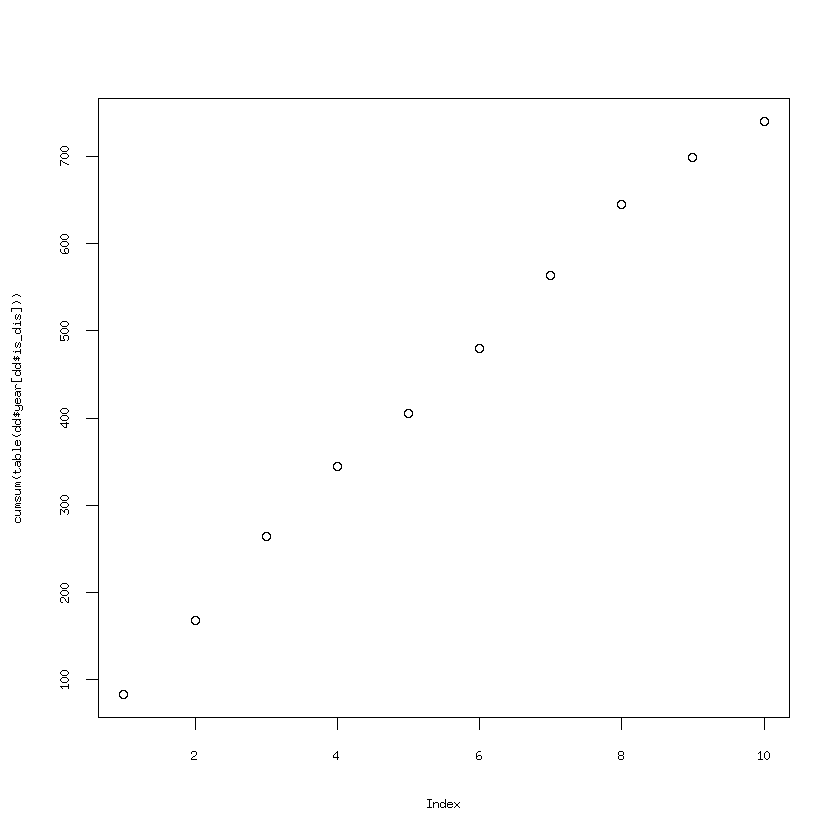

In [6]:
plot(cumsum(table(dd$year[dd$is_dis])))

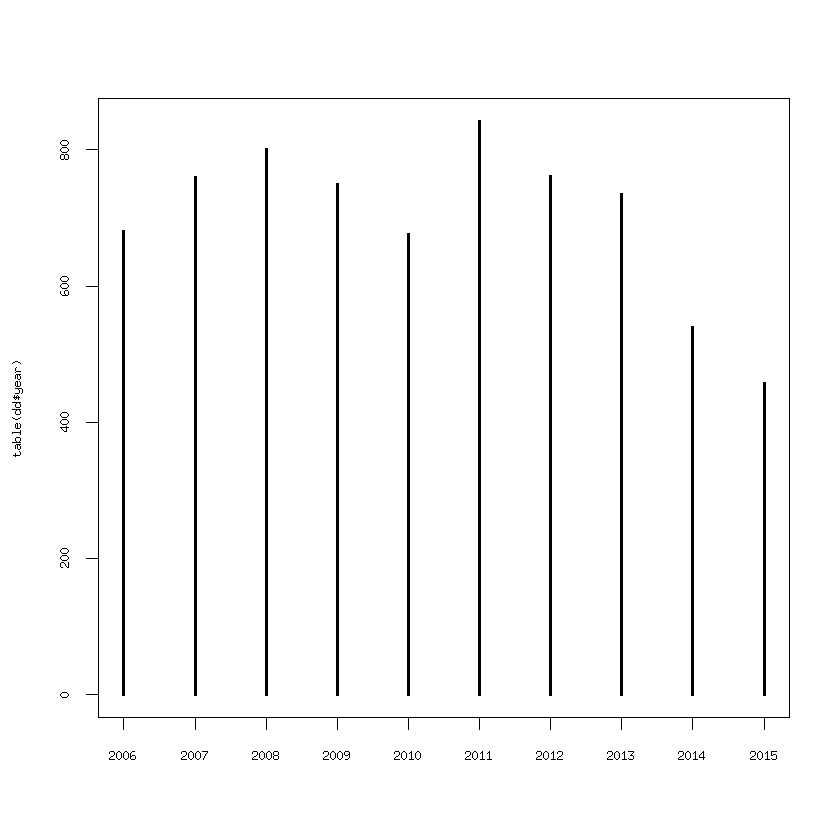

In [7]:
#All RCTs in the region
plot(table(dd$year))

#### Evolution of local share per year

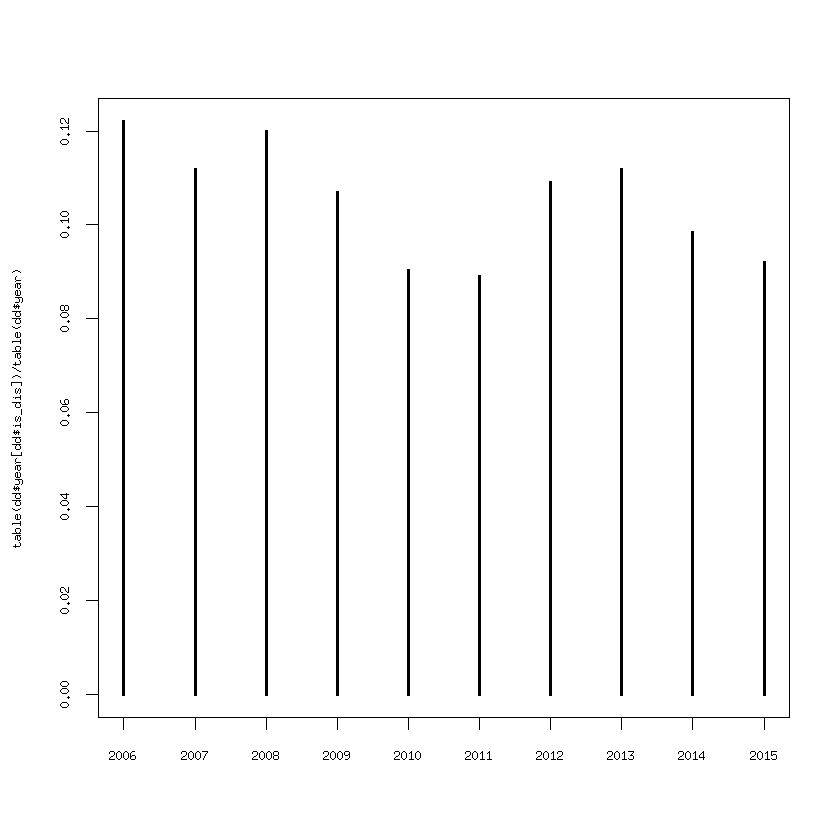

In [8]:
plot(table(dd$year[dd$is_dis])/table(dd$year))

In [9]:
library(ggplot2)
library(gdata)

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith



In [10]:
dplt <- do.call('rbind',tapply(dd$is_dis,dd$year,table))

In [11]:
dp <- rbind(data.frame(year = as.numeric(rownames(dplt)), Dis = "Oth_dis", Nb = cumsum(dplt[,1])),
            data.frame(year = as.numeric(rownames(dplt)), Dis = "Dis", Nb = cumsum(dplt[,2])))
dp$Dis <- reorder(dp$Dis,new.order=c("Dis","Oth_dis"))

In [12]:
pdf("Mapping_Cancer/Figures/Gap_analysis/CEE_Cardio.pdf")
ggplot(dp,aes(x=year,y=Nb,fill=Dis)) + geom_bar(stat="identity")
dev.off()

PNG 
  2

In [13]:
pdf("Mapping_Cancer/Figures/Gap_analysis/CEE_Cardio.pdf")
ggplot(dp,aes(x=year,y=Nb,fill=Dis)) + geom_area()
dev.off()

PNG 
  2

In [14]:
#options(jupyter.plot_mimetypes = 'image/png')
#p <- ggplot(dp,aes(x=year,y=Nb,fill=Dis)) + geom_area()
#p

In [15]:
#library(plotly)
#p <- ggplotly(p)
#embed_notebook(p,file="/home/igna/Desktop/wena.html")
#Quand je fais ²ceci ca enregistre le html dans un dossier dans working directory

In [16]:
install.packages("data.table")

also installing the dependency ‘chron’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
